In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
imdb_data=pd.read_csv(r'D:\駿燊\nlpPractice\IMDB Dataset.csv', encoding="unicode_escape")
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

C:\Users\DBLAB2020\anaconda3\envs\nlpPractice\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [5]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [6]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [12]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

In [14]:
def data_preprocessing(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text) # Remove HTML from text
    text = ''.join([c for c in text if c not in string.punctuation])# Remove punctuation
    text = [word for word in text.split() if word not in stop]
    text = ' '.join(text)
    return text

imdb_data['cleaned_reviews'] = imdb_data['review'].apply(data_preprocessing)
imdb_data.head()

,review,sentiment,cleaned_reviews
0,one review ha mention watch 1 oz episod youll ...,positive,one review ha mention watch 1 oz episod youll ...
1,wonder littl product film techniqu veri unassu...,positive,wonder littl product film techniqu veri unassu...
2,thought thi wa wonder way spend time hot summe...,positive,thought thi wa wonder way spend time hot summe...
3,basic famili littl boy jake think zombi hi clo...,negative,basic famili littl boy jake think zombi hi clo...
4,petter mattei love time money visual stun film...,positive,petter mattei love time money visual stun film...


In [15]:
from collections import Counter

In [16]:
corpus = [word for text in imdb_data['cleaned_reviews'] for word in text.split()]
count_words = Counter(corpus)
sorted_words = count_words.most_common()

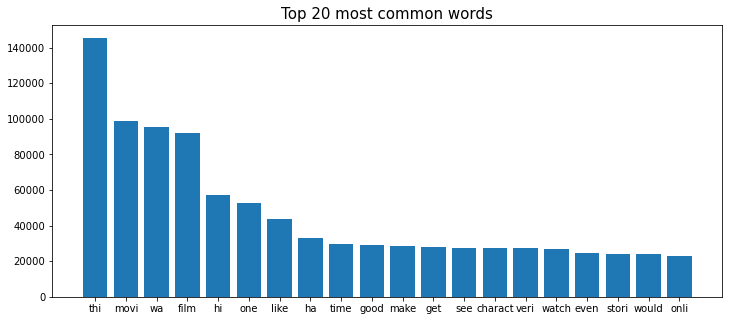

In [17]:
keys = []
values = []
for key, value in sorted_words[:20]:
    keys.append(key)
    values.append(value)
    
plt.figure(figsize=(12, 5))
plt.bar(keys, values)
plt.title('Top 20 most common words', size=15)
plt.show()

In [20]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

reviews_int = []
for text in imdb_data['cleaned_reviews']:
    r = [vocab_to_int[word] for word in text.split()]
    reviews_int.append(r)

print(reviews_int[:1])
imdb_data['Review int'] = reviews_int

[[6, 242, 8, 367, 16, 469, 2882, 202, 416, 1614, 127, 1, 561, 122, 5344, 37, 41, 2810, 2882, 3, 1101, 11153, 22, 549, 105, 127, 308, 31, 1389, 1, 23, 5008, 415, 8418, 1, 23, 590, 1712, 1091, 668, 340, 549, 2956, 250, 73, 42629, 178, 2882, 6185, 313, 10962, 5474, 1839, 532, 42630, 1112, 1291, 16965, 454, 3387, 1924, 790, 1929, 1815, 883, 248, 17598, 12572, 277, 3777, 3152, 454, 298, 60100, 3487, 9452, 5870, 1084, 934, 2174, 12573, 15357, 258, 2036, 5871, 426, 6717, 6439, 57, 167, 14913, 19, 46, 213, 810, 23, 612, 112, 207, 23, 505, 1494, 693, 115, 296, 1055, 2201, 194, 693, 638, 693, 60101, 84, 759, 117, 37, 202, 63, 141, 2810, 1390, 3, 1746, 360, 46, 3, 1434, 16, 380, 944, 2882, 124, 7710, 277, 493, 1215, 549, 549, 5245, 2957, 1755, 10380, 2579, 19089, 4382, 10380, 113, 477, 12, 182, 25, 1034, 707, 662, 4382, 109, 790, 4108, 612, 304, 635, 1001, 790, 363, 16, 2882, 130, 146, 1801, 2610, 60102, 12, 459, 3388, 399]]


In [22]:
imdb_data['sentiment'] = imdb_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
imdb_data.head()


,review,sentiment,cleaned_reviews,Review int
0,one review ha mention watch 1 oz episod youll ...,1,one review ha mention watch 1 oz episod youll ...,"[6, 242, 8, 367, 16, 469, 2882, 202, 416, 1614..."
1,wonder littl product film techniqu veri unassu...,1,wonder littl product film techniqu veri unassu...,"[116, 59, 231, 4, 1622, 15, 13144, 15, 60103, ..."
2,thought thi wa wonder way spend time hot summe...,1,thought thi wa wonder way spend time hot summe...,"[110, 1, 3, 116, 40, 660, 9, 825, 1337, 2116, ..."
3,basic famili littl boy jake think zombi hi clo...,0,basic famili littl boy jake think zombi hi clo...,"[402, 150, 59, 243, 2848, 35, 564, 5, 3204, 5,..."
4,petter mattei love time money visual stun film...,1,petter mattei love time money visual stun film...,"[60107, 8419, 32, 9, 228, 528, 1086, 4, 16, 34..."


In [24]:
review_len = [len(x) for x in reviews_int]
imdb_data['Review len'] = review_len
imdb_data.head()

,review,sentiment,cleaned_reviews,Review int,Review len
0,one review ha mention watch 1 oz episod youll ...,1,one review ha mention watch 1 oz episod youll ...,"[6, 242, 8, 367, 16, 469, 2882, 202, 416, 1614...",175
1,wonder littl product film techniqu veri unassu...,1,wonder littl product film techniqu veri unassu...,"[116, 59, 231, 4, 1622, 15, 13144, 15, 60103, ...",91
2,thought thi wa wonder way spend time hot summe...,1,thought thi wa wonder way spend time hot summe...,"[110, 1, 3, 116, 40, 660, 9, 825, 1337, 2116, ...",94
3,basic famili littl boy jake think zombi hi clo...,0,basic famili littl boy jake think zombi hi clo...,"[402, 150, 59, 243, 2848, 35, 564, 5, 3204, 5,...",67
4,petter mattei love time money visual stun film...,1,petter mattei love time money visual stun film...,"[60107, 8419, 32, 9, 228, 528, 1086, 4, 16, 34...",130


count    50000.000000
mean       128.203380
std         95.040802
min          3.000000
25%         70.000000
50%         96.000000
75%        156.000000
max       1483.000000
Name: Review len, dtype: float64


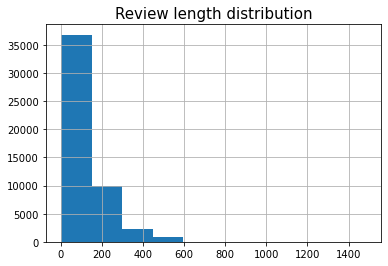

In [26]:
print(imdb_data['Review len'].describe())

imdb_data['Review len'].hist()
plt.title('Review length distribution', size=15)
plt.show()

Padding / Truncating the remaining data
- To deal with both short and long reviews, we will pad or truncate all our reviews to a specific length. We define this length by Sequence Length. This sequence length is same as number of time steps for LSTM layer.

- For reviews shorter than seq_length, we will pad with 0s. For reviews longer than seq_length we will truncate them to the first seq_length words.

In [27]:
def Padding(review_int, seq_len):
    '''
    Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_len), dtype = int)
    for i, review in enumerate(review_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)
            
    return features

In [28]:
features = Padding(reviews_int, 200)
print(features[0, :])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     6   242     8   367    16   469  2882   202   416  1614   127
     1   561   122  5344    37    41  2810  2882     3  1101 11153    22
   549   105   127   308    31  1389     1    23  5008   415  8418     1
    23   590  1712  1091   668   340   549  2956   250    73 42629   178
  2882  6185   313 10962  5474  1839   532 42630  1112  1291 16965   454
  3387  1924   790  1929  1815   883   248 17598 12572   277  3777  3152
   454   298 60100  3487  9452  5870  1084   934  2174 12573 15357   258
  2036  5871   426  6717  6439    57   167 14913    19    46   213   810
    23   612   112   207    23   505  1494   693   115   296  1055  2201
   194   693   638   693 60101    84   759   117    37   202    63   141
  2810  1390     3  1746   360    46     3  1434    16   380   944  2882
   124  7710   277   493  1215   549   549  5245  2

In [29]:
features.shape

(50000, 200)

Training, Validation, Test Dataset Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_remain, y_train, y_remain = train_test_split(features, imdb_data['sentiment'].to_numpy(), test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=1)

12) Dataloaders and Batching
- After creating our training, test and validation data. Next step is to create dataloaders for this data. We can use generator function for batching our data into batches instead we will use a TensorDataset. This is one of a very useful utility in PyTorch for using our data with DataLoaders with exact same ease as of torchvision datasets



In [40]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

In [41]:
# create tensor dataset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))


In [43]:
# dataloaders
batch_size = 50

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [45]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,    54,   901,  3587],
        [    0,     0,     0,  ...,   323,  2039,    16],
        [    0,     0,     0,  ...,    13,     1,     2],
        ...,
        [    0,     0,     0,  ...,   732,  2169, 16029],
        [    0,     0,     0,  ...,    14,  1976,    27],
        [    0,     0,     0,  ...,   568,  2039,   236]], dtype=torch.int32)
Sample input: 
 tensor([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1])


13) Define the LSTM Network Architecture
- The layers are as follows:

    - Tokenize : This is not a layer for LSTM network but a mandatory step of converting our words into tokens (integers)
    - Embedding Layer: that converts our word tokens (integers) into embedding of specific size
    - LSTM Layer: defined by hidden state dims and number of layers
    - Fully Connected Layer: that maps output of LSTM layer to a desired output size
    - Sigmoid Activation Layer: that turns all output values in a value between 0 and 1
    - Output: Sigmoid output from the last timestep is considered as the final output of this network

In [48]:
device = torch.device("cpu")

In [49]:
class sentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()
        
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        # Embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        # Dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # Linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        
        #embedding and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        #stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # Dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        #sigmoid function
        sig_out = self.sigmoid(out)
        
        # reshape to be batch size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.n_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.n_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [50]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int) + 1
output_size = 1
embedding_dim = 64
hidden_dim = 256
n_layers = 2

In [52]:
model = sentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model = model.to(device)

print(model)

sentimentLSTM(
  (embedding): Embedding(181513, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [54]:
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

clip = 5
epochs = 2
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model.zero_grad()
        output,h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
        val_h = tuple([each.data for each in val_h])

        inputs, labels = inputs.to(device), labels.to(device)

        output, val_h = model(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels.float())

        val_losses.append(val_loss.item())
            
        accuracy = acc(output,labels)
        val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        # torch.save(model.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

KeyboardInterrupt: 